In [1]:

!pip install rdflib

import rdflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import ttest_ind
from rdflib.namespace import RDF, XSD
from rdflib.serializer import Serializer
from rdflib import Graph, URIRef, Literal, BNode
 

The P-value is : 5.3187252634905425e-05
So We Reject Null Hypothesis.


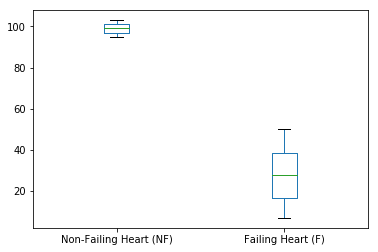

In [2]:
# Run the T-test for the means of two independent samples using the example data

labels = ['Non-Failing Heart (NF)','Failing Heart (F)']
data = [(95,50), (103,35), (99,21), (np.nan,15), (np.nan,7), (np.nan,40)]

df = pd.DataFrame.from_records(data, columns = labels)
tt = ttest_ind(df['Non-Failing Heart (NF)'],df[ 'Failing Heart (F)'],equal_var=False, nan_policy='omit')

print('The P-value is :', tt.pvalue)

if tt.pvalue <0.05:
  print("So We Reject Null Hypothesis.")
else:
  print("So We Accept Null Hypothesis.")

#drawing a boxplot for this T_test
df[['Non-Failing Heart (NF)','Failing Heart (F)']].plot(kind='box')

In [6]:
# Describe the statistical hypothesis test in machine readable form

# First, we initialize an RDF Graph and bind some prefixes

g = Graph()
g.bind('obo', 'http://purl.obolibrary.org/obo/')
g.bind('ex', 'http://example.org/')

# Next, we define some needed vocabulary
obo = dict()
obo['two sample t-test with unequal variance'] = URIRef('http://purl.obolibrary.org/obo/STATO_0000304')
obo['has specified input'] = URIRef('http://purl.obolibrary.org/obo/OBI_0000293')
obo['has specified output'] = URIRef('http://purl.obolibrary.org/obo/OBI_0000299')
obo['p-value'] = URIRef('http://purl.obolibrary.org/obo/OBI_0000175')
obo['has value specification'] = URIRef('http://purl.obolibrary.org/obo/OBI_0001938')
obo['scalar value specification'] = URIRef('http://purl.obolibrary.org/obo/OBI_0001931')
obo['has specified numeric value'] = URIRef('http://purl.obolibrary.org/obo/OBI_0001937')
obo['iron-responsive element binding'] = URIRef('http://purl.obolibrary.org/obo/GO_0030350')

# Now, populate the graph with statements
# As an example, the following statement types the resource (blank node) 'n1' as 'two sample t-test with unequal variance'
n1 = BNode()
g.add((n1, RDF.type, obo['two sample t-test with unequal variance']))

# Now, state that the t-test has iron-responsive element binding as a specified input (one statement to complete)
n2 = BNode()
g.add((n1, obo['has specified input'], n2))
g.add((n2, RDF.type, obo['iron-responsive element binding']))

# Next, state that the t-test has the p-value computed above as a specified output (two statements to complete)
n3 = BNode()
g.add((n1, obo['has specified output'], n3))
g.add((n3, RDF.type, obo['p-value']))

# The literal value of the p-value is represented as a scalar value specification with a specified numeric value (three statements to complete)
n4 = BNode()
g.add((n4, RDF.type, obo['scalar value specification']))
g.add((n3, obo['has value specification'], n4))

# Type the literal as double
g.add((n4, obo['has specified numeric value'], Literal(tt.pvalue, datatype = XSD.double)))


# Finally, serialize and print the graph in RDF/XML format

print(g.serialize(format="pretty-xml").decode('utf-8'))


    

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:obo="http://purl.obolibrary.org/obo/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <obo:STATO_0000304 rdf:nodeID="N2f71c056fb894fefa74762f55aca9643">
    <obo:OBI_0000293>
      <obo:GO_0030350 rdf:nodeID="N76269b157f184769aab3780ff3952bb3"/>
    </obo:OBI_0000293>
    <obo:OBI_0000299>
      <obo:OBI_0000175 rdf:nodeID="Nb68791e22191417eaa5a15352e6c95da">
        <obo:OBI_0001938>
          <obo:OBI_0001931 rdf:nodeID="Ne6d62006a204420fa865203e79d7aaa0">
            <obo:OBI_0001937 rdf:datatype="http://www.w3.org/2001/XMLSchema#double">5.3187252634905425e-05</obo:OBI_0001937>
          </obo:OBI_0001931>
        </obo:OBI_0001938>
      </obo:OBI_0000175>
    </obo:OBI_0000299>
  </obo:STATO_0000304>
</rdf:RDF>



In [4]:
# Process the machine readable statistical hypothesis test by completing the following SPARQL query that returns the p-value

q = """
PREFIX obo: <http://purl.obolibrary.org/obo/>

SELECT ?pvalue WHERE {
  ?r a obo:STATO_0000304 .
  ?r obo:OBI_0000293 [ a obo:GO_0030350 ].
  ?r obo:OBI_0000299 [
  a obo:OBI_0000175 ;
        obo:OBI_0001938 [
            a obo:OBI_0001931 ;
            obo:OBI_0001937 ?pvalue
        ] 
      ].
  FILTER (?pvalue < 0.005)
}
"""

for qs in g.query(q):
   print(qs[0])


5.3187252634905425e-05
